# TMDB movies

Load all the necessary packages

In [32]:

import pandas as pd
import matplotlib.pyplot as plt


The TMDB movies dataset contains detailed information about movies including ratings, financials, crew, cast, language, genres, and production details. 

### Loading the data

Load the dataset into a DataFrame named `df_movies` and inspect the first rows of the DataFrame.

In [33]:
df_movies = pd.read_csv("TMDB-movies-small.csv")
df_movies.head()

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,11,16,Dancer in the Dark,7.868,1697,Released,2000-09-01,40061153.0,140.0,12500000.0,...,"Drama, Crime","Lantia Cinema & Audiovisivi, Fine Line Feature...","Argentina, Denmark, Finland, France, Germany, ...",English,"Bobo Eriksson, Caroline Sascha Cogez, Bo Weste...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk
1,26,55,Amores Perros,7.600,2475,Released,2000-06-16,20908467.0,154.0,2000000.0,...,"Drama, Thriller","Altavista Films, Zeta Film",Mexico,Español,"Gerardo Campbell, Rosa María Bianchi, Ricardo ...",Alejandro González Iñárritu,Rodrigo Prieto,Guillermo Arriaga,"Martha Sosa Elizondo, Francisco González Compe...",Gustavo Santaolalla
2,31,64,Talk to Her,7.579,1233,Released,2002-03-15,64803131.0,112.0,NaN,...,"Drama, Romance","Vía Digital, Good Machine, El Deseo, Atresmedia",Spain,Español,"Carlos García Cambero, Leonor Watling, Pina Ba...",Pedro Almodóvar,Javier Aguirresarobe,Pedro Almodóvar,"Michel Ruben, Agustín Almodóvar","Alberto Iglesias, Vicente Amigo"
3,32,65,8 Mile,7.134,6958,Released,2002-11-08,242875078.0,111.0,41000000.0,...,"Drama, Music","Mikona Productions, Imagine Entertainment","Germany, United States of America",English,"Malik Barnhardt, Mike Bell, Allen Adams, Abdul...",Curtis Hanson,Rodrigo Prieto,Scott Silver,"Jimmy Iovine, Jim Whitaker, Brian Grazer, Greg...",NaN
4,38,71,Billy Elliot,7.600,3691,Released,2000-09-28,109280263.0,110.0,5000000.0,...,"Drama, Comedy, Music","StudioCanal, BBC Film, Tiger Aspect, Arts Coun...","France, United Kingdom, United States of America",English,"Lee Williams, Colin MacLachlan, Neil North, Pa...",Stephen Daldry,Brian Tufano,Lee Hall,"Jonathan Finn, Natascha Wharton, Tessa Ross, D...",Stephen Warbeck


### Top movies in 2000

Create a new DataFrame `df_2000` with all movies released in the year 2000. Inspect the amount of rows in the new DataFrame.

In [34]:
df_movies["release_date"] = pd.to_datetime(df_movies["release_date"])


df_2000 = df_movies[df_movies["release_date"] < pd.to_datetime("2001-01-01")]
# df_2000 = df_movies[df_movies["revenue"] > 500000000]

# df_2000.sort_values("release_date")

Create a new DataFrame `df_topmovies` which only incorporates the rows with the movies of the year 2000 who get an average score of at least 9. Compare the total amount of rows of the original dataframe with these of df_topmovies.

In [35]:
df_topmovies = df_2000[df_2000["vote_average"] > 9]

print(df_topmovies.shape[0], df_2000.shape[0])

145 2850


In `df_topmovies`, only include the movies with a valid release date and runtime.

In [36]:
# df_topmovies = [row for row in df_topmovies if row.loc["release_date"] != pd.NA]
# df_topmovies = [df_topmovies.iloc[i] for i in range(df_topmovies.shape[0]) if df_topmovies.iloc[i]["release_date"] != ""]
# print(type(df_topmovies.iloc[0]["release_date"] == pd.NA))
df_topmovies.dropna(subset=("release_date", "runtime"))

# df_topmovies[["release_date"] != pd.NA]

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
1388,18982,30553,Emperor: Emperial Live Ceremony,10.0,1,Released,2000-05-15,NaN,61.0,NaN,...,Music,Wildcat Productions,"Norway, United Kingdom",English,"Charmand Grimloch, Jan Erik Tiwaz, Vegard Sver...",NaN,NaN,NaN,NaN,NaN
2380,38178,55698,Escape to Grizzly Mountain,10.0,1,Released,2000-03-14,NaN,95.0,NaN,...,"Fantasy, Drama, Family, Comedy",MGM Family Entertainment,United States of America,NaN,"Charlotte Dodds, Miko Hughes, Dan Haggerty, Cy...",Anthony Dalesandro,Steve Adcock,"Eric Parkinson, Beau Bauman, Lisa Dalesandro, ...","Herb Linsey, Tony Cataldo, Menahem Golan, Geor...",NaN
2499,40712,59077,Une Femme Taxi à Sidi Bel Abbès,10.0,1,Released,2000-07-03,NaN,52.0,NaN,...,Documentary,"Les Films de la Passerelle, Machaho Productions","Algeria, Belgium",العربية,NaN,Belkacem Hadjadj,NaN,Belkacem Hadjadj,Christine Pireaux,NaN
2959,51327,73156,Todo por que rías,9.8,2,Released,2000-07-08,NaN,0.0,NaN,...,Comedy,NaN,Argentina,Español,"Daniel Rabinovich, Marcos Mundstock, Carlos Ló...",NaN,NaN,NaN,NaN,NaN
3020,52768,75049,American Tragedy,10.0,1,Released,2000-11-12,NaN,170.0,NaN,...,"Drama, TV Movie",Fox Television Studios,United States of America,English,"Darryl Alan Reed, Peter MacKenzie, Harvey Levi...",Lawrence Schiller,Bruce Surtees,"James Willwerth, Lawrence Schiller, Norman Mailer","Lawrence Schiller, Lynn Raynor",Bill Conti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,778388,1097371,Power Rangers Lightspeed Rescue,10.0,1,Released,2000-04-18,NaN,72.0,NaN,...,NaN,NaN,NaN,English,"Ron Roggé, Diane Salinger, Jennifer L. Yen, Se...",NaN,NaN,NaN,NaN,NaN
9309,787683,1110302,Quand Les Alpinistes Font Leur Cinéma,10.0,1,Released,2000-01-01,NaN,47.0,NaN,...,Documentary,Migoo Production,France,Français,"Joseph Vallot, Alain Pol, Christophe Profit, P...",Claude Francillon,NaN,NaN,NaN,NaN
9343,817045,1150924,Morten og peter - ikke helt gak!,10.0,1,Released,2000-01-13,NaN,0.0,NaN,...,Documentary,TV 2,Denmark,Dansk,NaN,NaN,NaN,NaN,NaN,NaN
9347,820190,1154916,Chikan torakku: Injo norippanashi,9.5,1,Released,2000-09-05,NaN,60.0,NaN,...,"Romance, Comedy",NaN,Japan,日本語,"Motoko Sasaki, Masanori Machida, Sheena Nagamori",Kazuyoshi Sekine,NaN,NaN,NaN,NaN


Add a column "final_run" displaying the last day the film was screened in theaters. 

In [37]:
lst = [column_name for column_name in df_topmovies]
print(lst)

# df_topmovies["overview"]
# df_topmovies["popularity"]
# df_topmovies["tagline"]
df_topmovies["final_run"] = [pd.NA for _ in range(145)]

# df_topmovies.loc["final_run"] = 1
# df_topmovies.drop(["final_run"], inplace=True)

# df_topmovies.loc["final_run"].__delitem__()
df_topmovies

['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'budget', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'director', 'director_of_photography', 'writers', 'producers', 'music_composer']


C:\Users\sashk\AppData\Local\Temp\ipykernel_26576\2693576768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topmovies["final_run"] = [pd.NA for _ in range(145)]


,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,final_run
1313,17027,28002,Lazarus Lives,10.0,1,Released,2000-06-01,NaN,NaN,NaN,...,"Rich Animation Studios, NEST Family Entertainm...",United States of America,English,"Karen Kondazian, Ann Marie Lee, Andrew Craig, ...",Richard Rich,NaN,Brian Nissen,"Jared F. Brown, Richard Rich, Seldon O. Young",NaN,<NA>
1388,18982,30553,Emperor: Emperial Live Ceremony,10.0,1,Released,2000-05-15,NaN,61.0,NaN,...,Wildcat Productions,"Norway, United Kingdom",English,"Charmand Grimloch, Jan Erik Tiwaz, Vegard Sver...",NaN,NaN,NaN,NaN,NaN,<NA>
2380,38178,55698,Escape to Grizzly Mountain,10.0,1,Released,2000-03-14,NaN,95.0,NaN,...,MGM Family Entertainment,United States of America,NaN,"Charlotte Dodds, Miko Hughes, Dan Haggerty, Cy...",Anthony Dalesandro,Steve Adcock,"Eric Parkinson, Beau Bauman, Lisa Dalesandro, ...","Herb Linsey, Tony Cataldo, Menahem Golan, Geor...",NaN,<NA>
2499,40712,59077,Une Femme Taxi à Sidi Bel Abbès,10.0,1,Released,2000-07-03,NaN,52.0,NaN,...,"Les Films de la Passerelle, Machaho Productions","Algeria, Belgium",العربية,NaN,Belkacem Hadjadj,NaN,Belkacem Hadjadj,Christine Pireaux,NaN,<NA>
2959,51327,73156,Todo por que rías,9.8,2,Released,2000-07-08,NaN,0.0,NaN,...,NaN,Argentina,Español,"Daniel Rabinovich, Marcos Mundstock, Carlos Ló...",NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,778388,1097371,Power Rangers Lightspeed Rescue,10.0,1,Released,2000-04-18,NaN,72.0,NaN,...,NaN,NaN,English,"Ron Roggé, Diane Salinger, Jennifer L. Yen, Se...",NaN,NaN,NaN,NaN,NaN,<NA>
9309,787683,1110302,Quand Les Alpinistes Font Leur Cinéma,10.0,1,Released,2000-01-01,NaN,47.0,NaN,...,Migoo Production,France,Français,"Joseph Vallot, Alain Pol, Christophe Profit, P...",Claude Francillon,NaN,NaN,NaN,NaN,<NA>
9343,817045,1150924,Morten og peter - ikke helt gak!,10.0,1,Released,2000-01-13,NaN,0.0,NaN,...,TV 2,Denmark,Dansk,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
9347,820190,1154916,Chikan torakku: Injo norippanashi,9.5,1,Released,2000-09-05,NaN,60.0,NaN,...,NaN,Japan,日本語,"Motoko Sasaki, Masanori Machida, Sheena Nagamori",Kazuyoshi Sekine,NaN,NaN,NaN,NaN,<NA>


Show how many films were released each month using a barplot.
* Use appropriate labels and titles
* Change the ticks and tick labels so every month has a tick and as label the abbreviation of the month (Jan, Feb, March etc.)
* Change the color of the graph
* Show a grid
* Show the legend

In [38]:
movie_count = df_2000.groupby("release_date")["release_date"].count()
# for index in t.index:
#     print(t.loc[index])
#     print(index.month)
# print(t)
# print(t[0])
# for e in t:
#     print(e[0])

def group_by_month(data):
    count = {"Jan": 0, "Feb": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "Aug": 0, "Sep": 0, "Oct": 0, "Nov": 0, "Dec": 0}
    for index in data.index:
        if index.month == 1:
            count["Jan"] += data.loc[index]
        elif index.month == 2:
            count["Feb"] += data.loc[index]
        elif index.month == 3:
            count["March"] += data.loc[index]
        elif index.month == 4:
            count["April"] += data.loc[index]
        elif index.month == 5:
            count["May"] += data.loc[index]
        elif index.month == 6:
            count["June"] += data.loc[index]
        elif index.month == 7:
            count["July"] += data.loc[index]
        elif index.month == 8:
            count["Aug"] += data.loc[index]
        elif index.month == 9:
            count["Sep"] += data.loc[index]
        elif index.month == 10:
            count["Oct"] += data.loc[index]
        elif index.month == 11:
            count["Nov"] += data.loc[index]
        else:
            count["Dec"] += data.loc[index]
    
    return count


data = group_by_month(movie_count)




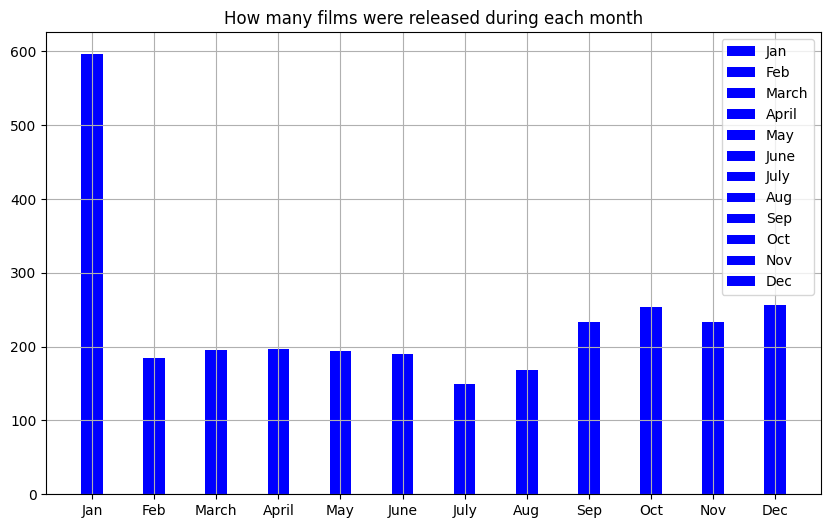

In [39]:
plt.figure(figsize=(10, 6))

bar_width = 0.35

for key, value in data.items():
    plt.bar(key, value, bar_width, color='blue', label=key)



plt.title("How many films were released during each month")
plt.grid()
plt.legend()

plt.show()

# df_2000.iloc[0]["release_date"].month

### All movies

For the following questions, work with the dataframe `df_movies`.

Extract following information from the release date and store this in new columns:
    day of the week, day of the month, month, year

In [40]:
df_movies

df_movies_date = pd.DataFrame()
df_movies_date["Day of the week"] = None
df_movies_date["Day of the month"] = None
df_movies_date["Month"] = None
df_movies_date["Day of the year"] = None

for date in df_movies["release_date"]:
    df_movies_date.loc[len(df_movies_date["Day of the week"])] = date.day_name()
    df_movies_date.loc[len(df_movies_date["Day of the month"])] = date.day
    df_movies_date.loc[len(df_movies_date["Month"])] = date.month
    df_movies_date.loc[len(df_movies_date["Day of the year"])] = date.year

df_movies_date


# len(df_movies_date["Day of the week"])
# for date in df_movies["release_date"]:
#     df_movies_date["Day of the week"]

,Day of the week,Day of the month,Month,Day of the year
0,Friday,Friday,Friday,Friday
1,1,1,1,1
2,9,9,9,9
3,2000,2000,2000,2000
4,Friday,Friday,Friday,Friday
...,...,...,...,...
37563,2000,2000,2000,2000
37564,Wednesday,Wednesday,Wednesday,Wednesday
37565,18,18,18,18
37566,12,12,12,12


Create a new column `profit`, derived from subtracting the budget from the revenue. Remove all rows which do not contain valid revenue or budget data. Also create a column with booleans indicating wheter a film `is_profitable` (profit >0) or not.

In [41]:
df_movies.dropna(subset=("revenue", "budget"), inplace=True)
df_movies["profit"] = df_movies["revenue"] = df_movies["budget"]
df_movies["is_profitable"] = df_movies["profit"] > 0

# df_movies[df_movies["is_profitable"] == False]

**What are the top 10 most frequent genres?**

We are looking for the individual values, not the unique entries of genre combinations. It should be clear that you will have to do some data manipulations in order to get the answer.

To get you started: When analysing the video games dataset, we have seen a method to create separate rows (each with the same index) to represent multiple values of a column. This method takes a list-like object as argument. 

Tip: tackle this assignment step by step.

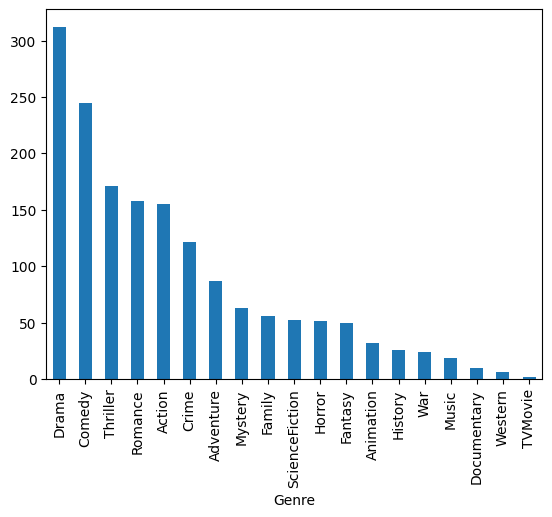

In [81]:
# Not related; just to see all the columns
columns = [column for column in df_movies]


# genres = df_movies.explode("genres")

# import ast
# df_movies["genres"] = df_movies["genres"].apply(lambda x: ast.literal_eval(x))


# For some reason, NaN's type is float.
df_movies.dropna(subset=("genres"), inplace=True)
# types = set()

# for genre in df_movies["genres"]:
#     types.add(type(genre))
#     if type(genre) == float:
#         print(genre)
# print(types)
#######################################


# genres_test = pd.DataFrame({
#     "Title": df_movies["title"],
#     "Genre": df_movies["genres"].tolist()
# })


genres = []
for genre in df_movies["genres"]:
    genres_without_spaces = "".join(genre.split())
    genre_list = genres_without_spaces.split(",")
    genres.append(genre_list)


genres_test = pd.DataFrame({
    "Title": df_movies["title"],
    "Genre": genres
})

    


genres_test = genres_test.explode("Genre")
genres_test



# most_frequent_genres = pd.DataFrame({"Genre": genres})



count_genres = genres_test["Genre"].value_counts().plot(kind="bar")

# most_frequent_genres = most_frequent_genres.explode("Genre")

# most_frequent_genres

**Number of actors and budget**


Plot the data so we can visually evaluate whether there seems a relation between the number of actors playing in a movie and the budget of the movie. Create a new_dataframe containing only the relevant columns. 

Create the same plot but now only containing the data of movies who's budget did not exceed 20 000 000.

**Votes**


Show the total number of votes for the year with the most releases.

More exercises? Feel free to explore the dataset further.